In [14]:
termSet = ['x','1.674','0','-1','rnd(0,1)']

funcSet = [['add',2],['sub',2],['mul',2],['pdiv',2],['sin',1],['cos',1]]

import random

def chooseElement(prims):
    return prims[random.randint(0,len(prims)-1)]

def genExpr(funcs, terms, maxD, grow = False):
    tLen = len(terms)
    if (maxD == 0) or ((grow) and (random.random() < tLen/(tLen + len(funcs)))):
        expr = (chooseElement(terms))
    else:
        func = chooseElement(funcs)
        expr = [func[0]]
        for i in range(func[1]):
            expr.append(genExpr(funcs,terms,maxD-1))
    return expr
            
print(genExpr(funcSet, termSet, 3))

print(genExpr(funcSet, termSet, 3, True))

['cos', ['sin', ['add', '0', '1.674']]]
['cos', ['pdiv', ['sub', '0', '0'], ['cos', '-1']]]


In [15]:
print("grow")
for i in range(5):
    print(genExpr(funcSet, termSet, 3, True))

print("")
print("full")
for i in range(5):
    print(genExpr(funcSet, termSet, 3))

grow
['cos', ['sub', ['add', 'rnd(0,1)', 'x'], ['cos', '-1']]]
['mul', ['sin', ['sub', 'rnd(0,1)', 'x']], ['sub', ['mul', '1.674', '0'], ['sub', 'rnd(0,1)', '0']]]
1.674
['sin', ['sin', ['pdiv', 'rnd(0,1)', 'rnd(0,1)']]]
['pdiv', ['pdiv', ['add', '-1', '1.674'], ['cos', '-1']], ['pdiv', ['mul', '0', 'rnd(0,1)'], ['sin', '1.674']]]

full
['cos', ['mul', ['cos', 'x'], ['sin', '-1']]]
['sin', ['pdiv', ['mul', '1.674', 'rnd(0,1)'], ['pdiv', 'rnd(0,1)', '0']]]
['mul', ['add', ['sub', 'rnd(0,1)', '-1'], ['cos', 'x']], ['cos', ['mul', 'rnd(0,1)', '0']]]
['add', ['pdiv', ['sin', 'x'], ['sin', '-1']], ['mul', ['sub', '-1', '-1'], ['mul', '-1', 'x']]]
['pdiv', ['sub', ['mul', '1.674', 'x'], ['cos', '-1']], ['add', ['mul', '0', '1.674'], ['pdiv', 'x', '0']]]


['cos', ['mul', ['mul', '0', '-1'], ['cos', 'rnd(0,1)']]]


(-7.0, 1.0)

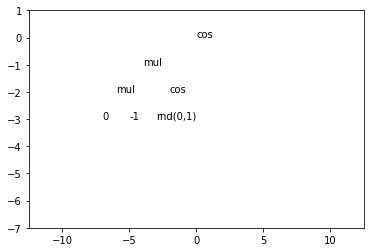

In [18]:
from matplotlib import pyplot

expr = genExpr(funcSet, termSet, 3,  False)

print(expr)

def rr(expr, x, y, ax, d = 1):
    if type(expr) == list:
        ax.text(x,y,expr[0])
        rr(expr[1],x-5/d, y-1, ax, d*2)
        if len(expr) == 3:
            rr(expr[2], x+4/d, y-1, ax, d*2)
    else:
        ax.text(x,y,expr)

fix, ax = pyplot.subplots()
rr(expr,0,0,ax)
ax.set_xlim([-12.5,12.5])
ax.set_ylim([-7,1])